In [10]:
from matplotlib import pyplot as plt
from lmfit import Model
import numpy as np
import pandas as pd

In [11]:
df = pd.read_excel('data.xlsx')
UN=df["UN"].tolist()
UT=df["UT"].tolist()
T =df["T"].tolist()

In [12]:
def linear(x,a,b):
    return a*x+b
lmodel=Model(linear)
result=lmodel.fit(UN, x=T, a=1, b=0)


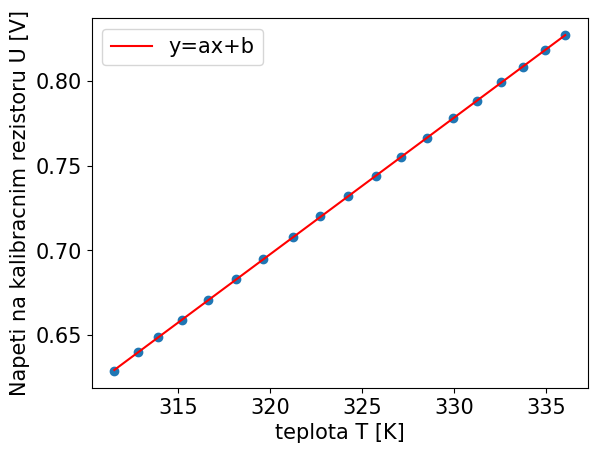

In [13]:
plt.scatter(T, UN)
plt.plot(T, result.best_fit, color = "red", label='y=ax+b')
plt.rcParams.update({'font.size': 15})
plt.ylabel('Napeti na kalibracnim rezistoru U [V]', fontsize=15)
plt.xlabel('teplota T [K]', fontsize=15)
plt.legend()
plt.show()

In [14]:
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 19
    # variables        = 2
    chi-square         = 1.5101e-06
    reduced chi-square = 8.8832e-08
    Akaike info crit   = -306.607239
    Bayesian info crit = -304.718361
[[Variables]]
    a:  0.00805438 +/- 8.8736e-06 (0.11%) (init = 1)
    b: -1.87977770 +/- 0.00287596 (0.15%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -1.000


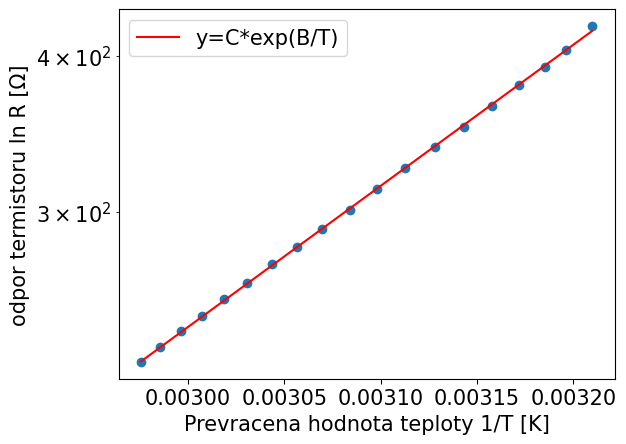

In [15]:
X=[]
U=[]
for i in T:
    X.append(1/i)

    
for j in range(len(UN)):
    U.append((UT[j]/UN[j])*330)

def ln (x,C,B):
    return C*np.exp(B/x)
lnmodel=Model(ln)
result=lnmodel.fit(U, x=T, C=1, B=1)


plt.rcParams.update({'font.size': 15})
plt.ylabel('odpor termistoru ln R [\u03A9]', fontsize=15)
plt.xlabel('Prevracena hodnota teploty 1/T [K]', fontsize=15)
plt.scatter(X, U)
plt.yscale("log")
plt.plot(X, result.best_fit, color = "red", label='y=C*exp(B/T)')
plt.legend()
plt.show()

In [16]:
print(result.fit_report())

[[Model]]
    Model(ln)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 134
    # data points      = 19
    # variables        = 2
    chi-square         = 25.3236707
    reduced chi-square = 1.48962769
    Akaike info crit   = 9.45871105
    Bayesian info crit = 11.3475890
[[Variables]]
    C:  0.10183101 +/- 0.00392643 (3.86%) (init = 1)
    B:  2592.37167 +/- 12.3720123 (0.48%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, B) = -1.000
